<h1>Importando os Dados</h1>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

OldDataFrame = pd.read_csv('kc_house_data.csv', encoding='UTF-8', sep=";")
DataFrame = OldDataFrame.query('price <= 1000000')
DataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503


<h3>A empresa, House Rocket, deseja obter infromações e o direcionamento de mercado de casas na cidade de King County, USA, para isto ela levantou as seguintes questões: </h3>
<h3> 
    <ol>
    <li>Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</li>  <br>   
    <li>Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</li>   <br>  
    <li> A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?</li>       
    </ol>
</h3>

<h6>Informações</h6>

sqft_basement = tamanho do porão

sqft_above = tamanho segundo andar

yr_built = ano de construção

yr_renovated = ano da reforma

# Observando casas reformadas para calcular sua valorização

In [67]:
Renovated = DataFrame[DataFrame['yr_renovated']!=0]
Unrenovated = DataFrame[DataFrame['yr_renovated']==0]

In [68]:
DataFrame.loc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,"47,6993","-122,3460",1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,"47,5107","-122,3620",1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,"47,5944","-122,2990",1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,"47,5345","-122,0690",1410,1287


In [69]:
Ren = Renovated['price'].mean()
Ren

544612.3682065217

In [70]:
Unr = Unrenovated['price'].mean()
Unr

464784.7875025757

In [71]:
print(Ren - Unr)

79827.580703946


<h3> Pelos passos acima podemos perceber que na média as casas reformadas são mais valorizadas que as casas sem reforma.
    
Sendo assim seria interessante o CEO reformar a casa antes de Vendê-la.
</h3>

<h3> Seguindo esta lógica, o recomendado seria o CEO comprar uma casa mais barata para reformar e revender.<br>
    
Primeiramente será analisada a casa que esteja entre as mais antigas e será verificado se esta resulta na casa mais barata, ou em um preço baixo.</h3>



# Buscando a casa mais antiga para comparar com o preço da mais barata

In [72]:
Cheaper = Unrenovated[Unrenovated['yr_built'] == Unrenovated['yr_built'].min()]
CheapestElderHouse = Cheaper[Cheaper['price'] == Cheaper['price'].min()]
print(CheapestElderHouse)
CheapestElderHouse['condition']

               id        date     price  bedrooms  bathrooms  sqft_living  \
14001  2354300456  2015-03-11  130000.0         2        1.0          600   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
14001      1500     1.0           0     0  ...      4         600   

       sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
14001              0      1900             0    98027  47,5289  -122,0330   

      sqft_living15  sqft_lot15  
14001          1130        6000  

[1 rows x 21 columns]


14001    4
Name: condition, dtype: int64

In [73]:
CheapestHouse = Unrenovated[Unrenovated['price'] == Unrenovated['price'].min()]
print(CheapestHouse)
CheapestHouse['condition']

              id        date    price  bedrooms  bathrooms  sqft_living  \
1149  3421079032  2015-02-17  75000.0         1        0.0          670   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149     43377     1.0           0     0  ...      3         670   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
1149              0      1966             0    98022  47,2638  -121,9060   

     sqft_living15  sqft_lot15  
1149          1160       42882  

[1 rows x 21 columns]


1149    3
Name: condition, dtype: int64

In [74]:
DataFrame.condition.mean()

3.4047548143736353

<h3> Diferente do esperado, nos resultados acima foi encontrada a casa mais antiga não renovada no valor de 130 mil, e também a mais barata encontrada no banco de dados, no valor de 75 mil.
    
    Analisando os preços pode-se dizer que não existe motivos evidentes para o CEO comprar a casa mais antiga, pois ambas casas tem o espaço de construção parecido (sqft_living) e apesar da casa de 75 mil estar numa condição pior e ter menos banheiros e quartos, isto pode ser solucionado na reforma, valorizando a casa, além de pagar 55 mil a menos. <br>
    
Apenas faria sentido comprar a casa antiga se fosse para uso imediato, sem pretensões de lucro, pois ela dispõe de uma melhor condição de moradia e recursos que a casa de 75 mil.
    
<br>
Sendo assim seria indicado que o CEO comprasse casas baratas no geral, entre 75 mil e 100mil, não importando muito com seu tempo de construção, uma vez que este não indica uma diminuição nos preços e nem com suas condições e itens como banheiros e quartos, uma vez que estes itens poderiam ser construidos numa reforma desde que o "sqft_lot" o possibilite.
</h3>

# Entendendo se o ZipCode impacta nos preços das casas

In [75]:
df = DataFrame.groupby('zipcode').mean()
df2 = DataFrame.groupby('zipcode').median()
df3 = DataFrame.groupby('zipcode').std()
ExpensiveZip = df[df['price'] == df['price'].max()]
print('ZipCode com casas mais caras em média', ExpensiveZip.index.values[0], 'valor médio', df['price'].max())

ZipCode com casas mais caras em média 98039 valor médio 900833.3333333334


In [76]:
CheapZip = df[df['price'] == df['price'].min()]
CheapZipmedian = df2[df2['price'] == df2['price'].min()]
CheapZipstd = df3[df3['price'] == df3['price'].min()]
generalMean = DataFrame['price'].mean()
generalMedian = DataFrame['price'].median()
generalstd = DataFrame['price'].std()
print('ZipCode com as casas de médias mais baratas fica no ',CheapZip.index.values,
      'valor médio de: %i' %(df['price'].min()))
print('média geral é de: %i' %(generalMean))
print('ZipCode com as casas de menor mediana fica no ',CheapZipmedian.index.values,
      'valor médio de: %i' %(df2['price'].min()))
print('média geral é de: %i' %(generalMedian))
print('ZipCode com as casas com menor desvio padrão fica no ',CheapZipstd.index.values,
      'valor médio de: %i' %(df3['price'].min()))
print('média geral é de: %i' %(generalstd))

ZipCode com as casas de médias mais baratas fica no  [98002] valor médio de: 234284
média geral é de: 467700
ZipCode com as casas de menor mediana fica no  [98002 98168] valor médio de: 235000
média geral é de: 434000
ZipCode com as casas com menor desvio padrão fica no  [98002] valor médio de: 52041
média geral é de: 196360


<h3> Outra variável que pode impactar o preço da casa é a localização, podemos análisar isso através da coluna "zipcode", e como visto anteriormente nos resultados seria interessante evitar o zipcode 98002, já que as medidas estatísticas apontam para um baixo valor das casas além de uma taxa de preço com pequenas variações, ou seja, muito provavelmente a localização tem grande impacto no valor da casa.<br>

<br>
Sabendo o valor médio das casas em King County, é possível afirmar que a reforma é uma boa estratégia, uma vez que o valor médio das casas reformadas, que é de 1.446.211.405, é maior que o valor médio das casas em geral e das casas não reformadas, como visto anteriormente.
</h3>

In [77]:
ID_Duplo = DataFrame[DataFrame['id'].duplicated(keep = False)]

ID_Duplo_Length = ID_Duplo.shape[0]

In [78]:
#CALCULANDO A VALORIZAÇÃO/DESVALORIZAÇÃO PELO TEMPO ENTRE OS IDS IGUAIS E SALVANDO OS VALORES EM meanProfit
meanProfit = []
for i in range(0, ID_Duplo_Length, 2):
    if(i+1 < ID_Duplo_Length):
        locActual = ID_Duplo.iloc[i,:]
        locProx = ID_Duplo.iloc[i+1,:]
        if(locActual.id == locProx.id):
            if locActual['date'] > locProx['date']:
                meanProfit.append(locActual['price']/locProx['price'])
            else:
                meanProfit.append(locProx['price']/locActual['price'])
        else:
            meanProfit.append(0)
    else:
        meanProfit.append(0)
        
#montando DataFrame com a valorização ou desvalorização dos imóveis
df_meanProfit = pd.DataFrame(meanProfit, columns = ['percentage'])    
df_meanProfit = df_meanProfit[df_meanProfit['percentage'] != 0]
#Passando de lista para DataFrame e retirando valores zerados

df_meanProfit.sort_values(by=['percentage'])

,percentage
114,0.945946
39,0.960686
6,0.976628
87,0.978000
131,0.990291
...,...
59,2.681707
83,2.764706
121,2.969697
139,3.308271


<h3> É possível perceber que existem algumas porcentagens atuando como outliers para cima, como um aumento de 718875.81%, quanto para baixo, como um "aumento" de 0.000084%, ou seja, uma diminuição. Sendo assim será removido tanto os 5 maiores quanto os 5 menores valores  </h3>

In [79]:
df_meanProfit.mean()

percentage    1.612801
dtype: float64

In [80]:
df_meanProfit.median()

percentage    1.592067
dtype: float64

In [81]:
df_meanProfit.mode()

,percentage
0,1.000000
1,1.238095


<AxesSubplot:title={'center':'Distribuição de Frequências - Acumulo dos valores dos calculos da valorização com o tempo'}, xlabel='Porcentagem de valorização', ylabel='Count'>

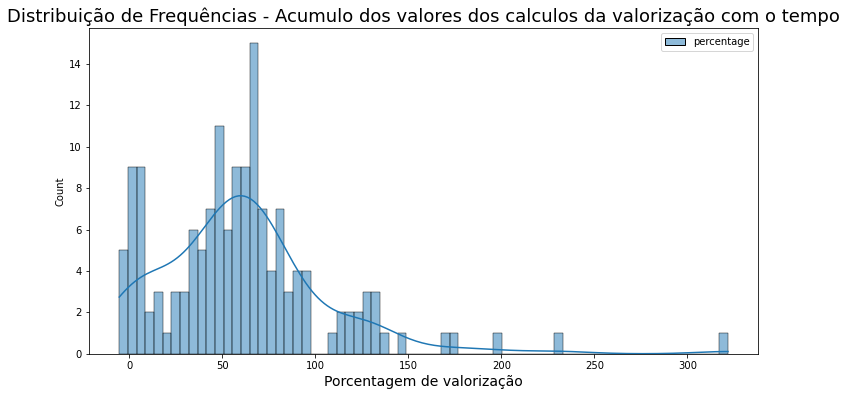

In [82]:
ax = sns.histplot((df_meanProfit-1)*100, bins = 70, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Acumulo dos valores dos calculos da valorização com o tempo', fontsize=18)
ax.set_xlabel('Porcentagem de valorização', fontsize=14)
ax

<h2> Pode-se inferir pelo resultado da média que as casas tendem a valorizar cerca de 25% com o tempo, porém se analisarmos a mediana, a moda e o gráfico acima, é possível observar que o maioria das casas tendem a desvalorizar com o tempo, uma vez que a mediana é menor que 1, ou seja, existe uma desvalorização na maioria das casas, o que também é possível de se observar no gráfico. Sendo assim, apenas esperar o tempo passar, não garantirá uma venda em um valor maior.
<br><br><br>
    Abaixo é explorado em qual mês o valor de venda é maior de acordo com os dados.
</h2>

In [83]:
DataFrame['date'] = pd.to_datetime(DataFrame['date'])
for i in range(12):
    meanMonth = DataFrame[DataFrame['date'].dt.month == i+1]
    print('a média de valor no mês', i+1, 'é de:', format(meanMonth['price'].mean(),'.1E'))

a média de valor no mês 1 é de: 4.5E+05
a média de valor no mês 2 é de: 4.5E+05
a média de valor no mês 3 é de: 4.7E+05
a média de valor no mês 4 é de: 4.9E+05
a média de valor no mês 5 é de: 4.7E+05
a média de valor no mês 6 é de: 4.8E+05
a média de valor no mês 7 é de: 4.7E+05
a média de valor no mês 8 é de: 4.7E+05
a média de valor no mês 9 é de: 4.7E+05
a média de valor no mês 10 é de: 4.6E+05
a média de valor no mês 11 é de: 4.5E+05
a média de valor no mês 12 é de: 4.5E+05


C:\Users\nethe\AppData\Local\Temp/ipykernel_268/970191112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['date'] = pd.to_datetime(DataFrame['date'])


C:\Users\nethe\AppData\Local\Temp/ipykernel_268/3738499388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month['month'] = data_month['date'].dt.month


<AxesSubplot:title={'center':'Média dos preços das casas de acordo com o mês'}, xlabel='Mês', ylabel='Preço'>

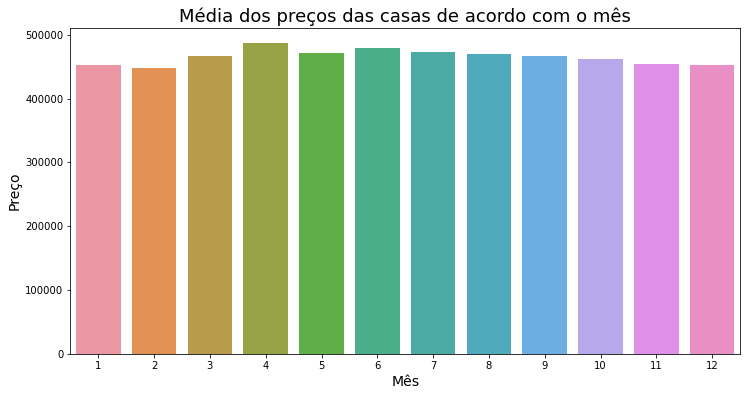

In [84]:
data_month = DataFrame
data_month['month'] = data_month['date'].dt.month


ax = sns.barplot(x = [i for i in range(1,13)], y =data_month.groupby('month').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o mês', fontsize=18)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<h2> Vimos que o valor de vendas começa a aumentar em maio(5) atinge o auge em julho(7) e
em seguida os valores diminuem alcançando uma baixa em novembro(11), se igualando com vendas do primeiro semestre exceto abril(4).<br><br><br> Abaixo a análise a ser feita vai além dos meses mas também em qual ano foram feitas essas vendas.</h2>

In [85]:
for j in range(2014, 2016, 1):
    for i in range(12):
        meanMonth = DataFrame[DataFrame['date'].dt.month == i+1]
        meanMonthPerYear = meanMonth[meanMonth['date'].dt.year == j]
        print('a média de valor no mês', i+1, 'no ano de', j,'é de:', format(meanMonthPerYear['price'].mean(),'.1E'))

a média de valor no mês 1 no ano de 2014 é de: NAN
a média de valor no mês 2 no ano de 2014 é de: NAN
a média de valor no mês 3 no ano de 2014 é de: NAN
a média de valor no mês 4 no ano de 2014 é de: NAN
a média de valor no mês 5 no ano de 2014 é de: 4.7E+05
a média de valor no mês 6 no ano de 2014 é de: 4.8E+05
a média de valor no mês 7 no ano de 2014 é de: 4.7E+05
a média de valor no mês 8 no ano de 2014 é de: 4.7E+05
a média de valor no mês 9 no ano de 2014 é de: 4.7E+05
a média de valor no mês 10 no ano de 2014 é de: 4.6E+05
a média de valor no mês 11 no ano de 2014 é de: 4.5E+05
a média de valor no mês 12 no ano de 2014 é de: 4.5E+05
a média de valor no mês 1 no ano de 2015 é de: 4.5E+05
a média de valor no mês 2 no ano de 2015 é de: 4.5E+05
a média de valor no mês 3 no ano de 2015 é de: 4.7E+05
a média de valor no mês 4 no ano de 2015 é de: 4.9E+05
a média de valor no mês 5 no ano de 2015 é de: 4.7E+05
a média de valor no mês 6 no ano de 2015 é de: NAN
a média de valor no mês 7 n

In [86]:
data_month = DataFrame
data_month['year-month'] = (data_month['date'].dt.year).astype(str) + '/' + (data_month['date'].dt.month).astype(str)
label = data_month['year-month'].value_counts().index
label 

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/1689871648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month['year-month'] = (data_month['date'].dt.year).astype(str) + '/' + (data_month['date'].dt.month).astype(str)


Index(['2015/4', '2014/7', '2014/6', '2014/8', '2014/10', '2015/3', '2014/9',
       '2014/5', '2014/12', '2014/11', '2015/2', '2015/1', '2015/5'],
      dtype='object')

In [87]:
label = ['2015/04', '2014/07', '2014/06', '2014/08', '2014/10', '2015/03', '2014/09',
       '2014/05', '2014/12', '2014/11', '2015/02', '2015/01', '2015/05']
label = sorted(label)
values = data_month.groupby('year-month').price.mean()

values.index

Index(['2014/10', '2014/11', '2014/12', '2014/5', '2014/6', '2014/7', '2014/8',
       '2014/9', '2015/1', '2015/2', '2015/3', '2015/4', '2015/5'],
      dtype='object', name='year-month')

<AxesSubplot:title={'center':'Média dos preços das casas de acordo com o mês e ano'}, xlabel='Ano / Mês', ylabel='Preço'>

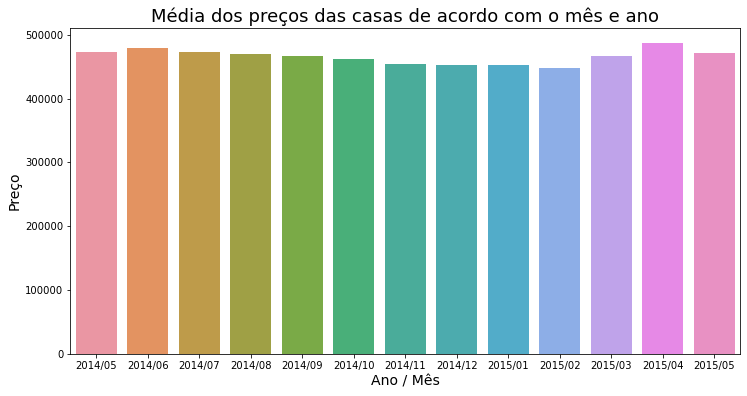

In [88]:
values.index = ['2014/10', '2014/11', '2014/12', '2014/05', '2014/06', '2014/07', '2014/08',
       '2014/09', '2015/01', '2015/02', '2015/03', '2015/04', '2015/05']

ax = sns.barplot(x = label , y = values.sort_index())
ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o mês e ano', fontsize=18)
ax.set_xlabel('Ano / Mês', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

<h2> Nesta análise vê-se que os dados confirmam a ideia de que as vendas a partir de julho tendem a ser maiores e também é possível inferir uma valorização nas casas de 2014 para 2015, desta forma uma estratégia de negócio seria esperar a valorização do imóvel de um ano para o outro, se esta for uma opção viável.<br><br><br> A análise abaixo busca compreender o impacto do número de banheiros no valor da casa.</h2>

In [89]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 100]
labels = [0, 1, 2, 3, 4, 5, 6, '7+']
df_bathrooms = DataFrame
df_bathrooms['frequencia'] =  pd.cut(x = df_bathrooms.bathrooms,
         bins = classes,
         labels = labels,
         include_lowest = True)
df_bathrooms[df_bathrooms['frequencia'] == 1].price.mean()

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/2159553197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bathrooms['frequencia'] =  pd.cut(x = df_bathrooms.bathrooms,


390085.19155099575

Text(0, 0.5, 'Preço')

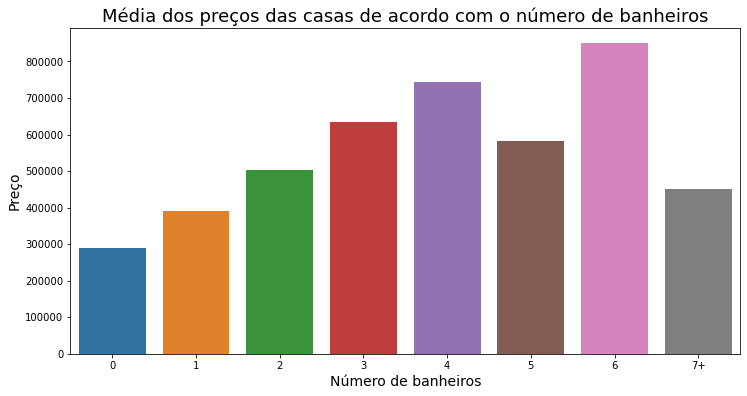

In [90]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

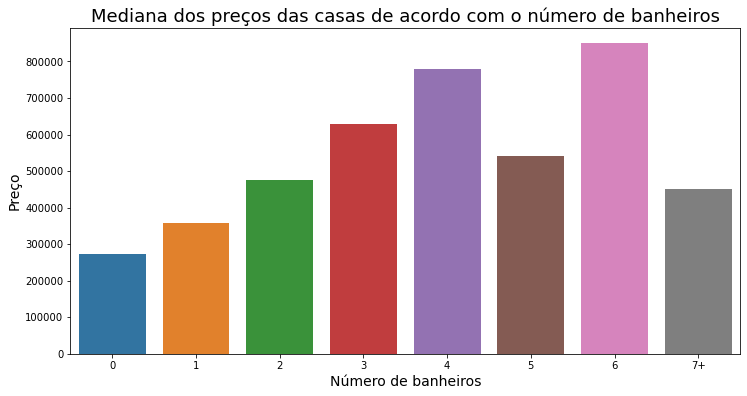

In [91]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

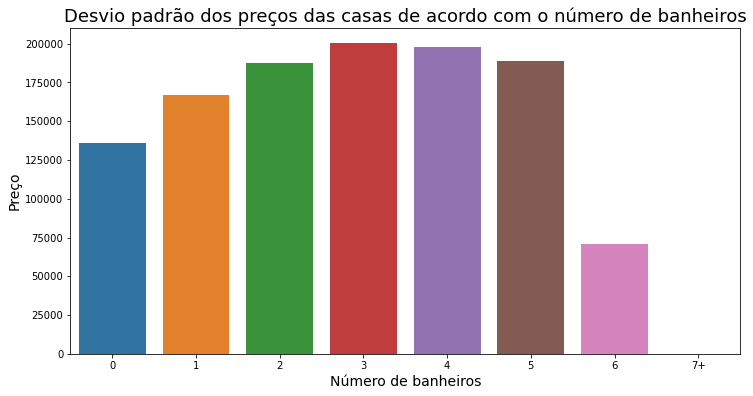

In [92]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio padrão dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

<h2> Pode-se observar que o número de banheiros provavelmente não é a variável que mais afeta o preço das casas, porém é interessante analisar que as casas da classe 6 banheiros tem uma valorização alta.</h2>

<h2> As análises abaixo serão feitas de mesma forma, mas levará em conta o número de quartos, andares, fontes de água frontal e view(que eu assumi como vista para pontos turísticos ou então paisagens).</h2>

In [93]:
bedrooms = DataFrame['bedrooms'].value_counts().sort_index()
save = bedrooms.tolist()
#print(bedrooms)
for i in range(len(bedrooms)):
    if i == 12:
        meanVal = DataFrame[DataFrame['bedrooms'] == 33]
        print('a média de valor para', 33, 'quartos é de:', format(meanVal['price'].mean(),'.1E'))
        save[i] = (meanVal['price'].mean())
    else:    
        meanVal = DataFrame[DataFrame['bedrooms'] == i]
        print('a média de valor para', i, 'quarto(s) é de:', format(meanVal['price'].mean(),'.1E'))
        save[i] = (meanVal['price'].mean())

        
    
    

a média de valor para 0 quarto(s) é de: 2.7E+05
a média de valor para 1 quarto(s) é de: 3.1E+05
a média de valor para 2 quarto(s) é de: 3.9E+05
a média de valor para 3 quarto(s) é de: 4.3E+05
a média de valor para 4 quarto(s) é de: 5.3E+05
a média de valor para 5 quarto(s) é de: 5.7E+05
a média de valor para 6 quarto(s) é de: 5.7E+05
a média de valor para 7 quarto(s) é de: 6.2E+05
a média de valor para 8 quarto(s) é de: 5.9E+05
a média de valor para 9 quarto(s) é de: 6.7E+05
a média de valor para 10 quarto(s) é de: 6.6E+05
a média de valor para 11 quarto(s) é de: 5.2E+05
a média de valor para 33 quartos é de: 6.4E+05


In [94]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 100]
labels = [0, 1, 2, 3, 4, 5, 6, '7+']
df_bedrooms = DataFrame
df_bedrooms['frequencia'] =  pd.cut(x = df_bedrooms.bedrooms,
         bins = classes,
         labels = labels,
         include_lowest = True)
df_bathrooms[df_bathrooms['frequencia'] == 1].price.mean()

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/1834681100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bedrooms['frequencia'] =  pd.cut(x = df_bedrooms.bedrooms,


312949.16161616164

Text(0, 0.5, 'Preço')

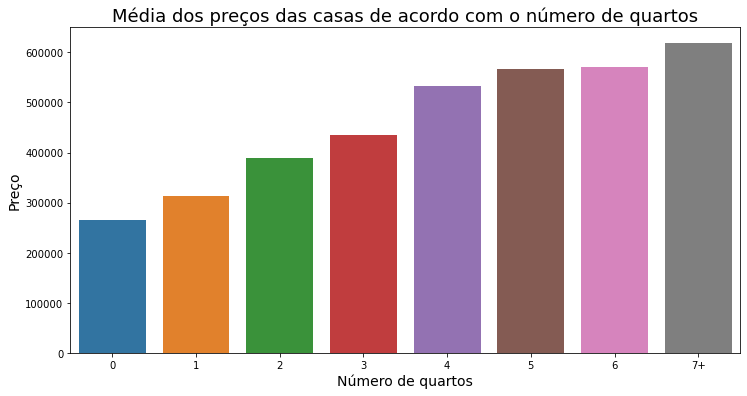

In [95]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

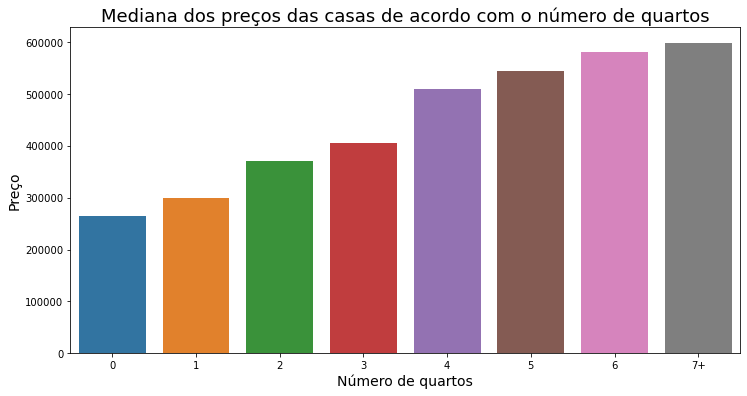

In [96]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

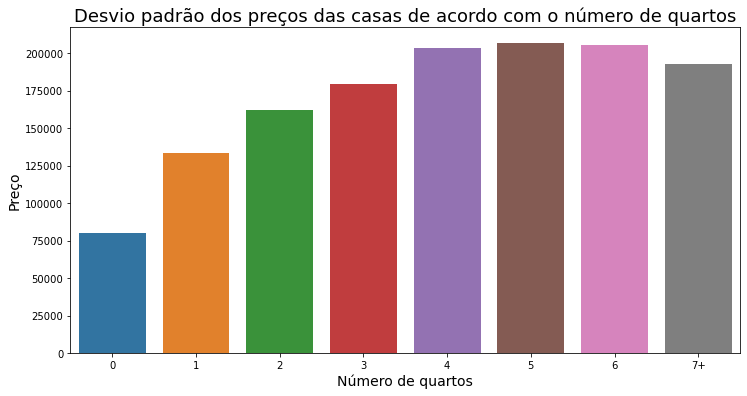

In [97]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio padrão dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

<h2> Pela média é possível concluir que ter quartos é uma decisão ruim, o que me faz pensar que estes dados não são apenas de casas e sim de qualquer construção, incluindo edifícios para negócios. Entretanto, observando a mediana e desvio padrão podemos perceber que o aumento de quartos tende a aumentar a mediana e o desvio padrão em comparação com a média, sendo assim podemos concluir que o número de quartos influência o valor de uma casa, não de um edifício de negócio onde não existe a necessidade de um quarto. Sendo assim percebo que para analisar melhor a base de dados seria necessário separar as casas das demais construções.</h2>

In [98]:
floors = DataFrame['floors'].value_counts().sort_index()
save = floors.tolist()
#print(floors)
for i in range(len(floors)):
    meanVal = DataFrame[DataFrame['floors'] == ((i*0.5)+1)]
    print('a média de valor para', ((i*0.5)+1), 'andar(es) é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())


a média de valor para 1.0 andar(es) é de: 4.1E+05
a média de valor para 1.5 andar(es) é de: 5.1E+05
a média de valor para 2.0 andar(es) é de: 5.3E+05
a média de valor para 2.5 andar(es) é de: 6.3E+05
a média de valor para 3.0 andar(es) é de: 5.0E+05
a média de valor para 3.5 andar(es) é de: 5.1E+05


In [99]:
classes = [1, 1.99, 2.99, 100]
labels = [ 1, 2, '3+']
df_floors = DataFrame
df_floors['frequencia'] =  pd.cut(x = df_floors.floors,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/2460776139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_floors['frequencia'] =  pd.cut(x = df_floors.floors,


Text(0, 0.5, 'Preço')

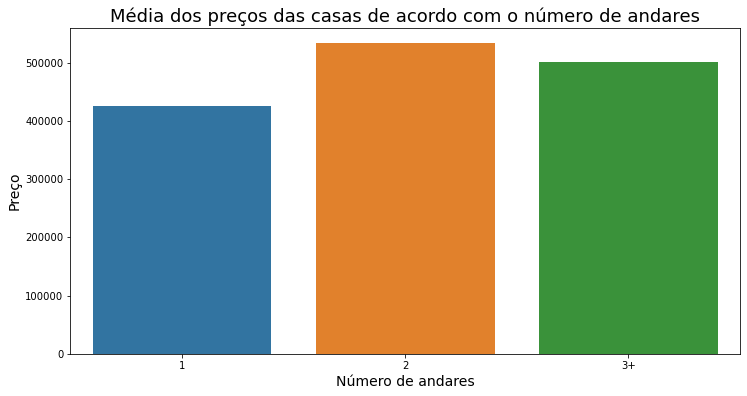

In [100]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

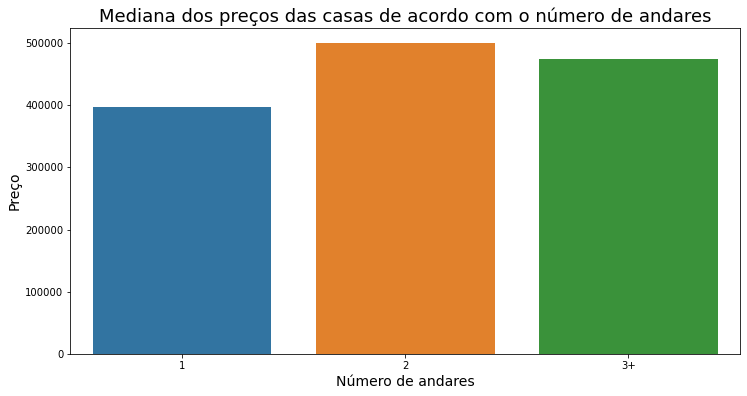

In [101]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

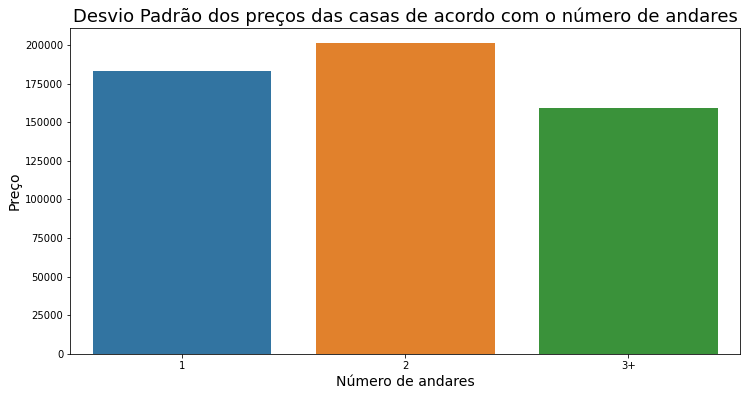

In [102]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

<h2> Assim como nos dados sobre banheiros, nos dados de andares vemos que o ideal do imóvel é ter 2 andares, pois este se mantém em alta tanto na média quanto na mediana, porém como seu desvio padrão também é elevado, podemos concluir que não é somente a quantidade de andares que afetará o preço da casa ou edifício.</h2>

In [103]:
waterfront = DataFrame['waterfront'].value_counts().sort_index()
save = waterfront.tolist()
#print(waterfront)
for i in range(len(waterfront)):
    meanVal = DataFrame[DataFrame['waterfront'] == i]
    print('a média de valor para', i, 'fonte de água frontal é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())

a média de valor para 0 fonte de água frontal é de: 4.7E+05
a média de valor para 1 fonte de água frontal é de: 6.6E+05


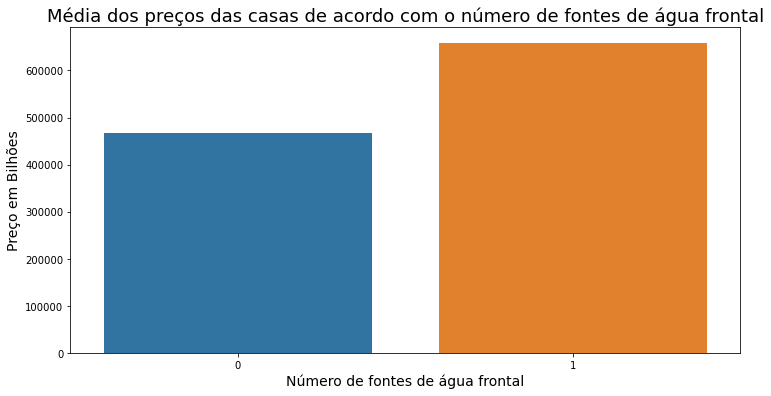

In [104]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)
print()

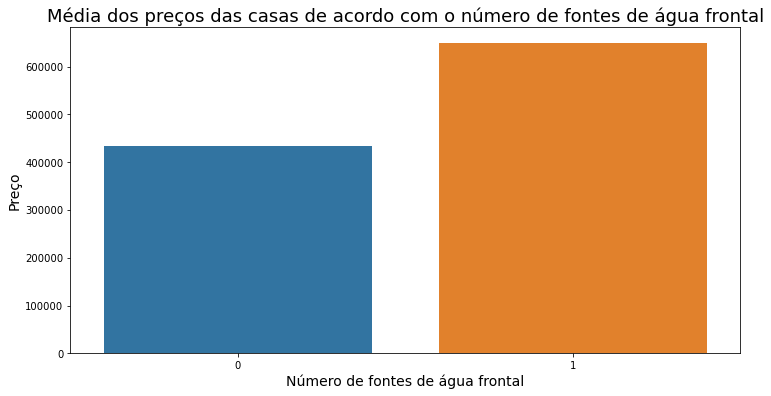

In [105]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
print()

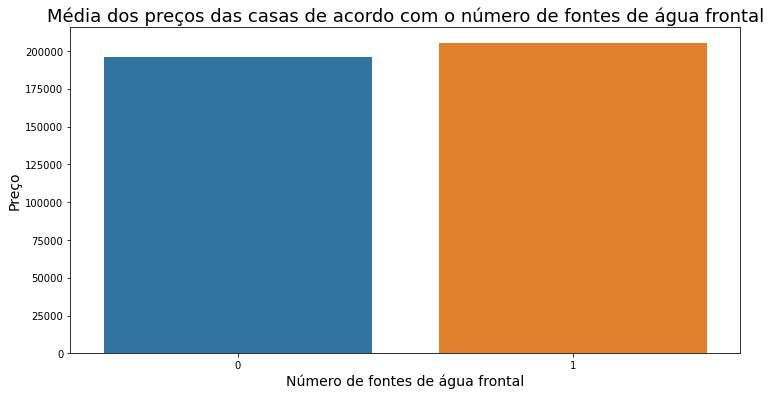

In [106]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
print()

<h2> Sobre os resultados acima, vemos que com uma mediana na casa dos milhões e com o desvio padrão e média na casa dos bilhões podemos concluir que a fonte pode até influênciar o valor, mas certamente não é um fator principal neste quesito.</h2>

In [107]:
view = DataFrame['view'].value_counts().sort_index()
save = view.tolist()
#print(view)
for i in range(len(view)):
    meanVal = DataFrame[DataFrame['view'] == i]
    print('a média de valor para', i, 'vista(s) é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())

a média de valor para 0 vista(s) é de: 4.6E+05
a média de valor para 1 vista(s) é de: 6.1E+05
a média de valor para 2 vista(s) é de: 6.0E+05
a média de valor para 3 vista(s) é de: 6.2E+05
a média de valor para 4 vista(s) é de: 7.3E+05


In [108]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 100]
labels = [ 0, 1, 2, 3, '4+']
df_view = DataFrame
df_view['frequencia'] =  pd.cut(x = df_view.view,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/1444613015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view['frequencia'] =  pd.cut(x = df_view.view,


Text(0, 0.5, 'Preço')

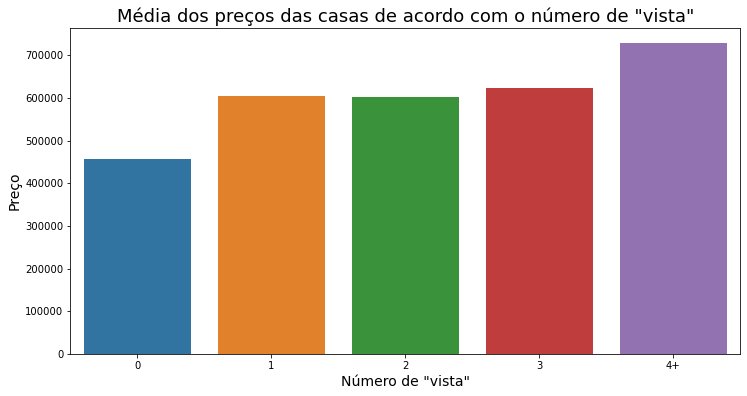

In [109]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

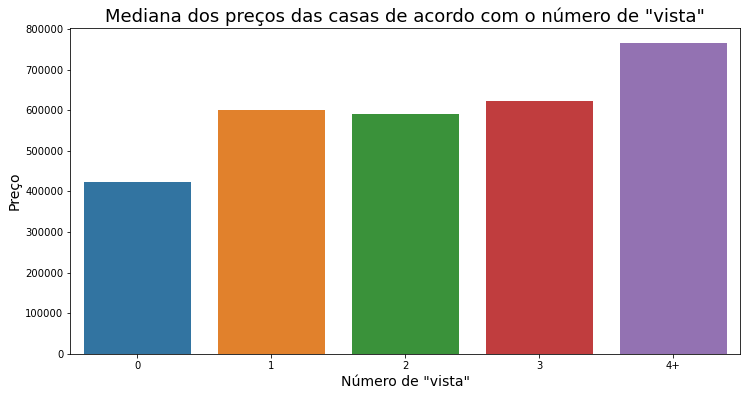

In [110]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

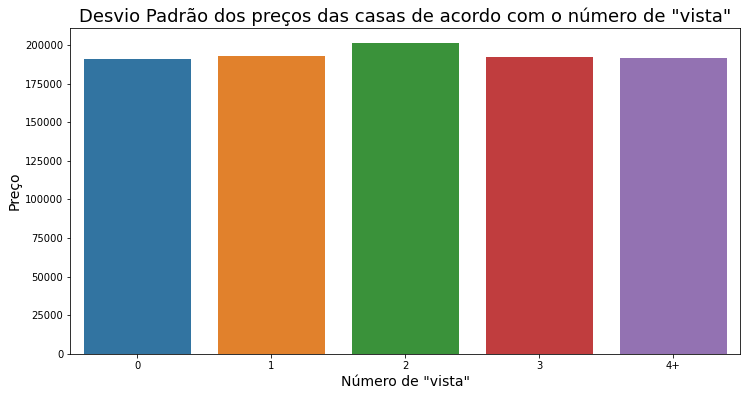

In [111]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

In [112]:
classes = [0, 2000, 4000, 6000, 8000, 100000]
labels = [ '0-2000', '2000-4000', '4000-6000', '6000-8000', '8000+']

df_sqf = DataFrame
df_sqf['frequencia'] = pd.cut(x = df_sqf.sqft_living,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/3278992763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sqf['frequencia'] = pd.cut(x = df_sqf.sqft_living,


Text(0, 0.5, 'Preço')

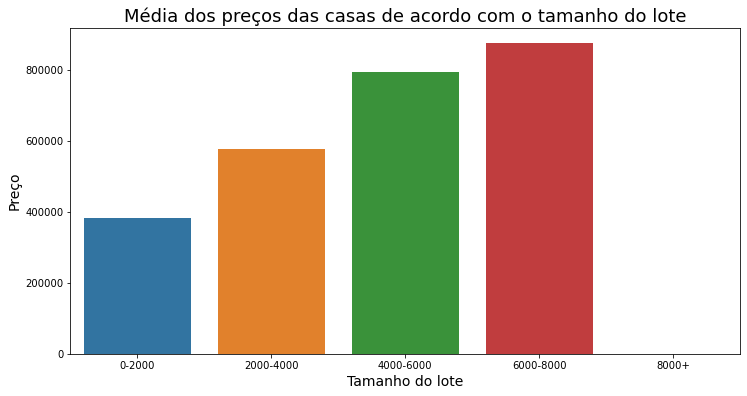

In [113]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o tamanho do lote', fontsize=18)
ax.set_xlabel('Tamanho do lote', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

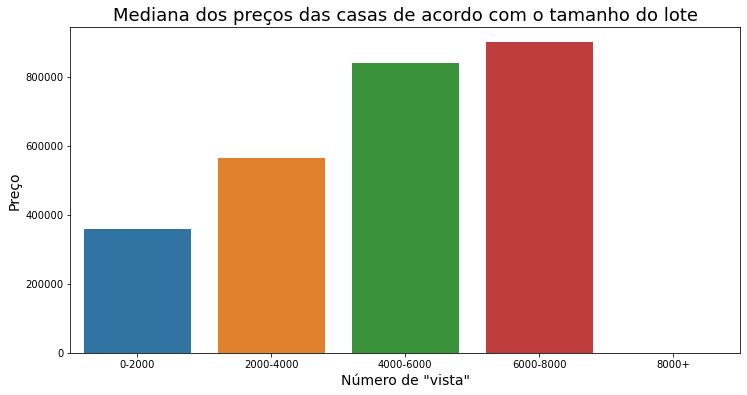

In [114]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o tamanho do lote', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

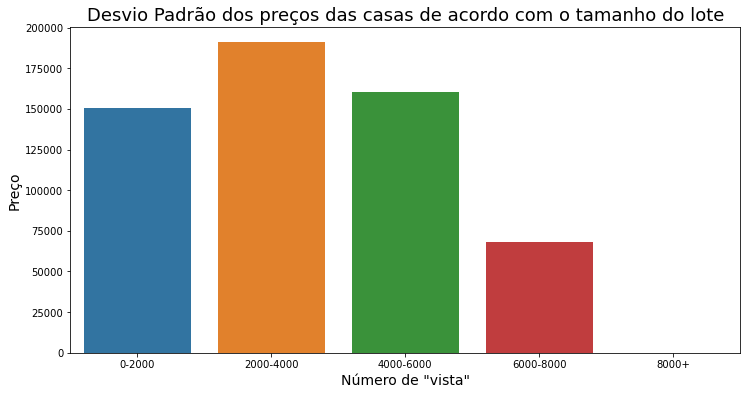

In [115]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o tamanho do lote', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

# analisar

In [116]:
classes = [0, 1, 2, 3, 4, 5]
labels = [ '1', '2', '3', '4', '5']

df_sqf = DataFrame
df_sqf['condition'] = pd.cut(x = df_sqf.condition,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_268/630237197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sqf['condition'] = pd.cut(x = df_sqf.condition,


Text(0, 0.5, 'Preço')

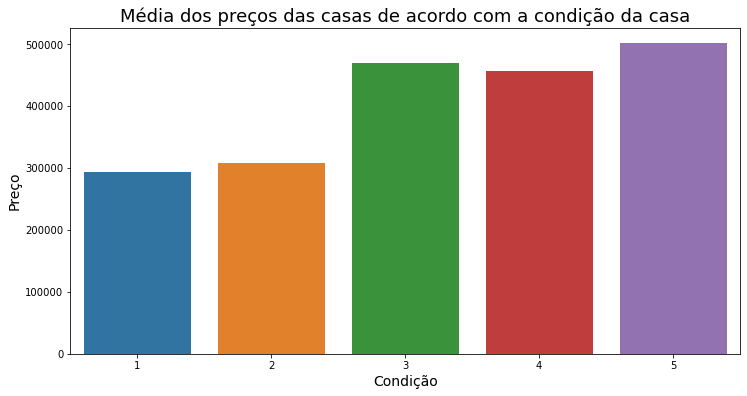

In [117]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('condition').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com a condição da casa', fontsize=18)
ax.set_xlabel('Condição', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)


Text(0, 0.5, 'Preço')

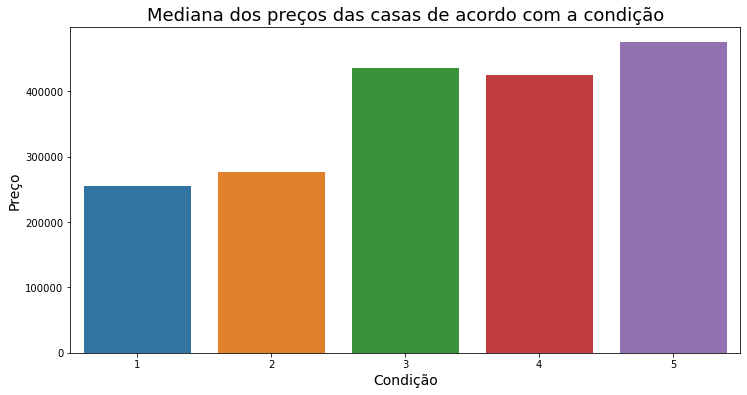

In [118]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('condition').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com a condição', fontsize=18)
ax.set_xlabel('Condição', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

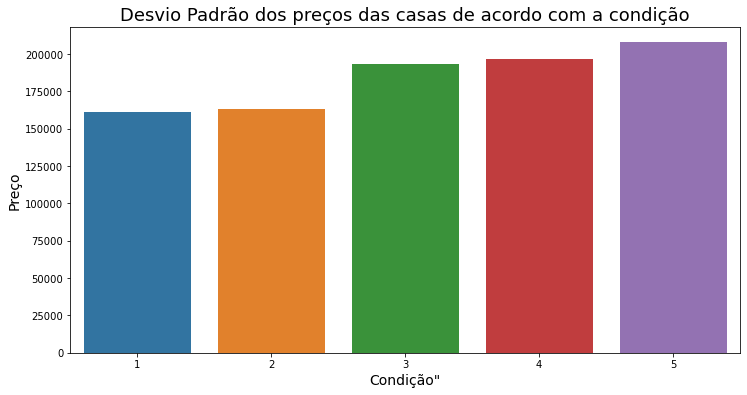

In [119]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('condition').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com a condição', fontsize=18)
ax.set_xlabel('Condição"', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço')

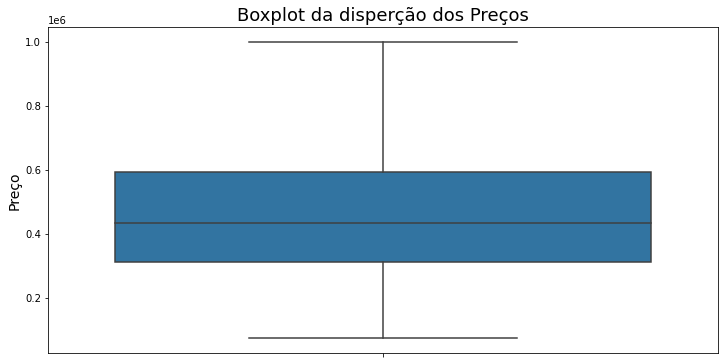

In [130]:
ax = sns.boxplot(y = DataFrame.price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da disperção dos Preços', fontsize=18)
ax.set_ylabel('Preço', fontsize=14)